Version 1.6, 14 May 2024

STORM Track dataset details: 

https://www.nature.com/articles/s41597-020-0381-2

https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d

https://data.4tu.nl/articles/STORM_IBTrACS_present_climate_synthetic_tropical_cyclone_tracks/12706085?file=24876980

The 10,000 year TC STORM dataset, based on the present climate, is publicly accessible and can be found on the 4TU.Centre for Research Data repository (https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d). The dataset is split in separate files per basin, with each .txt-file containing 1,000 years of simulations (i.e. 10 files per basin). Each .txt-file consists of a series of arrays, with each array being a single time step (3-hourly) for a synthetic TC. The colmns of the arrays are given in this table:

Image
Bloemendaal, Nadia; Haigh, I.D. (Ivan); de Moel, H. (Hans); Muis, S; Haarsma, R.J. (Reindert) et. al. (2022): STORM IBTrACS present climate synthetic tropical cyclone tracks. Version 4. 4TU.ResearchData. dataset. https://doi.org/10.4121/12706085.v4

Bloemendaal, Nadia; de Moel, H. (Hans); Martinez, Andrew B.; Muis, S. (Sanne); Haigh, I.D. (Ivan) et. al. (2023): STORM Climate Change synthetic tropical cyclone tracks. Version 2. 4TU.ResearchData. dataset. https://doi.org/10.4121/14237678.v2

In [132]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import cheer_utils
import importlib
importlib.reload(cheer_utils)
print(cheer_utils.__doc__)


from scipy import interpolate as sci
#from scipy.interpolate import RBFInterpolator

# pd.options.mode.copy_on_write = True

## https://visibleearth.nasa.gov/collection/1484/blue-marble
## https://neo.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG
#os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/static"



    CHEER_UTILS
    utilities for CHEER-STORM
    from repo for codes/processing of STORM datasets for CHEER
    Version 1.5, 23 Apr 2024
    GitHub Repo: git@github.com:BrianOBlanton/CHEER-STORM.git
    Brian Blanton, RENCI



In [80]:
# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=5
lo=-71.5
la=33.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}


dlo, dla = 5, 5
ext={ 0: [tx_circ['lo']-dlo, tx_circ['lo']+dlo, tx_circ['la']-dla, tx_circ['la']+dla],
      1: [nc_circ['lo']-dlo, nc_circ['lo']+dlo, nc_circ['la']-dla, nc_circ['la']+dla]}


In [81]:
# define some plotting vars
makeplots=True
writeoutputfiles=False
# marker size
sz=20

## Load IBTRaCS
## converts units to MKS
### Parameters to LoadIBTrACS:

- minyear: delete tracks < minyear
- maxyear: delete tracks > maxyear

In [73]:
df_ib=cheer_utils.LoadIBTrACS() # minyear=1980)
df_ib

/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abssn'].loc[idx]=i
/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RMW']=df['RMW']*1.852   # nm to km
/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,USA_ATCF_ID,SID,USA_STATUS
abssn,,,,,,,,,,,,,,,
0,1950,8,12,0,NA,17.1000,-55.5000,NaN,18.005540,NaN,930,TS,AL011950,1950224N17305,TS
0,1950,8,12,3,NA,17.4176,-55.8722,NaN,19.034428,NaN,930,TS,AL011950,1950224N17305,TS
0,1950,8,12,6,NA,17.7000,-56.3000,NaN,20.577760,NaN,933,TS,AL011950,1950224N17305,TS
0,1950,8,12,9,NA,17.9350,-56.8204,NaN,21.606648,NaN,924,TS,AL011950,1950224N17305,TS
0,1950,8,12,12,NA,18.2000,-57.4000,NaN,23.149980,NaN,866,TS,AL011950,1950224N17305,TS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2023,11,17,12,NA,17.0364,-79.8000,1004.0,15.433320,185.2,200,NR,AL222023,2023319N11282,DB
1194,2023,11,17,15,NA,17.4991,-79.1718,1004.0,15.433320,277.8,115,NR,AL222023,2023319N11282,DB
1194,2023,11,17,18,NA,18.0000,-78.5000,1004.0,15.433320,370.4,24,NR,AL222023,2023319N11282,DB


In [5]:
# show complete track for storm with largest RMW
# print(df_ib['RMW'].max())
# df_ib.loc[df_ib.RMW.idxmax()]

In [6]:
# further screening of df
#df_ib=df_ib.loc[(df_ib['NATURE']=='TS')]
# & (df['Min_pres'] <= 980)]

## load STORM dataset
## default is to read first 1000 yrs of present climate
### Parameters to LoadSTORMtracks:
- basin='NA' 
- ensnum=0
- climate='current'
- model='present'
- version='_V4'
- nyears=None
- startingyear=None

In [74]:
nyears="all"
df_st=cheer_utils.LoadSTORMtracks() # nyears=nyears)

Reading STORM tracks from https://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data/present_V4/STORM_DATA_IBTRACS_NA_1000_YEARS_0.txt


In [91]:
df_st

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,dist2nc,dist2tx,HollandB
abssn,,,,,,,,,,,,,,
1,0.0,10.0,1.0,0.0,1.0,8.9,-45.2,993.946699,20.371998,46.299999,851.946656,36.183042,52.969803,1.501835
1,0.0,10.0,1.0,3.0,1.0,9.0,-45.7,992.800000,21.200000,45.905957,815.967429,35.751958,52.470373,1.502786
1,0.0,10.0,1.0,6.0,1.0,9.1,-46.4,992.100000,21.700000,45.511914,766.103506,35.180001,51.787257,1.503737
1,0.0,10.0,1.0,9.0,1.0,9.2,-47.3,993.000000,21.100000,45.117872,705.759651,34.472344,50.921312,1.504688
1,0.0,10.0,1.0,12.0,1.0,9.3,-48.3,993.100000,20.900000,44.723829,647.548285,33.705230,49.965288,1.505639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,999.0,8.0,1.0,9.0,1.0,24.8,-88.5,990.300000,23.600000,92.599998,354.551796,19.212040,7.234639,1.032020
10522,999.0,8.0,1.0,12.0,1.0,25.4,-89.2,992.000000,22.400000,92.599998,391.816444,19.570705,6.312686,1.024250
10522,999.0,8.0,1.0,15.0,1.0,26.1,-89.9,990.000000,23.900000,92.599998,317.926065,19.926929,5.326350,1.015185


## Add distance to sites, Delta P, and Holland-B

In [92]:
df_ib['dist2nc']=np.sqrt(np.square(df_ib['Longitude']-nc_circ['lo']) + np.square(df_ib['Latitude']-nc_circ['la']))
df_ib['dist2tx']=np.sqrt(np.square(df_ib['Longitude']-tx_circ['lo']) + np.square(df_ib['Latitude']-tx_circ['la']))
df_ib['HollandB']=cheer_utils.HbFromRmwLat(df_ib['RMW'],df_ib['Latitude'])
df_ib['DeltaP']=-(df_ib['Min_pres']-1024)

axx=(-(df_ib[k]-1024))

df_st['dist2nc']=np.sqrt(np.square(df_st['Longitude']-nc_circ['lo']) + np.square(df_st['Latitude']-nc_circ['la']))
df_st['dist2tx']=np.sqrt(np.square(df_st['Longitude']-tx_circ['lo']) + np.square(df_st['Latitude']-tx_circ['la']))
df_st['HollandB']=cheer_utils.HbFromRmwLat(df_st['RMW'],df_st['Latitude'])
df_st['DeltaP']=-(df_st['Min_pres']-1013)


## Apply "spatial" screening for study sites

In [95]:
df_ib_nc=df_ib.loc[(df_ib['dist2nc'] <= nc_circ['rad'])] #  & (df_ib['NATURE']=='TS')]
df_st_nc=df_st.loc[(df_st['dist2nc'] <= nc_circ['rad'])]

In [174]:
# extract genesis locations
ib_glo=[]
ib_gla=[]
ib_gdp=[]

IDX=np.unique(df_ib.index).astype(int)
    
for i,idx in enumerate(IDX): 
    ib_glo.append(df_ib.loc[df_ib.index==idx].Longitude.values[0])
    ib_gla.append(df_ib.loc[df_ib.index==idx].Latitude.values[0])
    ib_gdp.append(df_ib.loc[df_ib.index==idx].DeltaP.values[0])
    

    
st_glo=[]
st_gla=[]
st_gdp=[]

IDX=np.unique(df_st.index).astype(int)
    
for i,idx in enumerate(IDX): 
    st_glo.append(df_st.loc[df_st.index==idx].Longitude.values[0])
    st_gla.append(df_st.loc[df_st.index==idx].Latitude.values[0])
    st_gdp.append(df_st.loc[df_st.index==idx].DeltaP.values[0])
        

## Track density plots

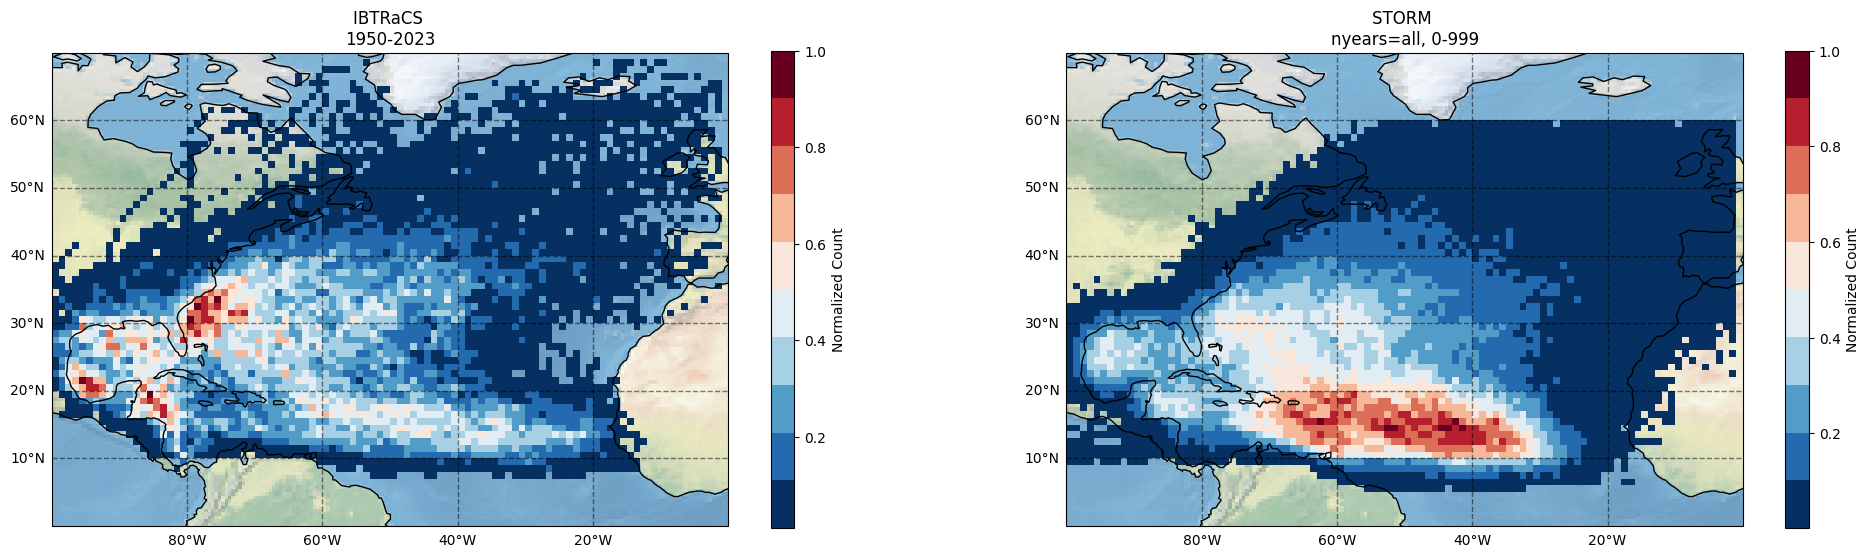

In [170]:
# generate a grid for histogram2d
lo0=-100
lo1=0
la0=0
la1=70
dx,dy=1,1

lon_bins=np.arange(lo0,lo1,dx)
lat_bins=np.arange(la0,la1,dy)

density=False
log10=False
normalized_count=True

cmapName='RdBu_r'

density_ib,      _,      _ = np.histogram2d(df_ib.Longitude,df_ib.Latitude, bins=(lon_bins,lat_bins), density=density)
density_st, xedges, yedges = np.histogram2d(df_st.Longitude,df_st.Latitude, bins=(lon_bins,lat_bins), density=density)

if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(24,10), sharey=True)

    ThisCmap=cheer_utils.discrete_cmap(15, 'jet')
  
    if density:
        
        cbstr='Point density (n/N/area)'
        
        tol=1e-4
        tempib=np.where(density_ib.T < tol, np.nan, density_ib.T)
        tempst=np.where(density_st.T < tol, np.nan, density_st.T)
 
        if log10:
            vmin, vmax = -4, -2.5
            nc=15
            tempib=np.log10(tempib)
            tempst=np.log10(tempst)
            cbstr=f'log10 ({cbstr})'
        else:
            vmin, vmax = 1e-3, 1e-8
            nc=10
            
    else:
        
        cbstr='Count'
        nc=10
        
        vmin, vmax = 0, np.power(10,np.ceil(np.log10(density_ib.T.max())))
        
        tempib=np.where(density_ib.T< 1, np.nan, density_ib.T)
        tempst=np.where(density_st.T< 1, np.nan, density_st.T)
        
        if normalized_count:
            tempib=tempib/density_ib.max()
            tempst=tempst/density_st.max()
            cbstr=f'Normalized {cbstr}'
            
    tstr=[f'IBTRaCS \n{df_ib["Year"].min()}-{df_ib["Year"].max()}',
          f'STORM \nnyears={nyears}, {int(df_st["Year"].min())}-{int(df_st["Year"].max())}']
        
    ThisCmap=cheer_utils.discrete_cmap(nc, cmapName)

    axm=[]
    axm.append(ax[0].pcolormesh(lon_bins, lat_bins, tempib, cmap=ThisCmap)) #, vmin=vmin, vmax=vmax)) 
    axm.append(ax[1].pcolormesh(lon_bins, lat_bins, tempst, cmap=ThisCmap)) #, vmin=vmin, vmax=vmax)) 

    # hex grid
    #axm.append(ax[0].hexbin(df_ib.Longitude,df_ib.Latitude, cmap=cmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 
    #axm.append(ax[1].hexbin(df_st.Longitude,df_st.Latitude, cmap=cmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 

    for i in range(0,2):
        #ax[i].axis('equal')
        ax[i].set_ylim([la0, la1])
        ax[i].set_xlim([lo0, lo1])
        ax[i].grid(True)
        ax[i].set_aspect(1.0/np.cos(np.mean(lat_bins) * np.pi / 180.0))
        cb=fig.colorbar(axm[i], ax=ax[i], shrink=0.62)
        cb.ax.set_ylabel(cbstr)
        ax[i].stock_img()
        #ax[i].background_img(name='BM', resolution='low')

        ax[i].coastlines()
        ax[i].set_title(tstr[i])
        gl=ax[i].gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        

In [171]:
# make genesis location plot


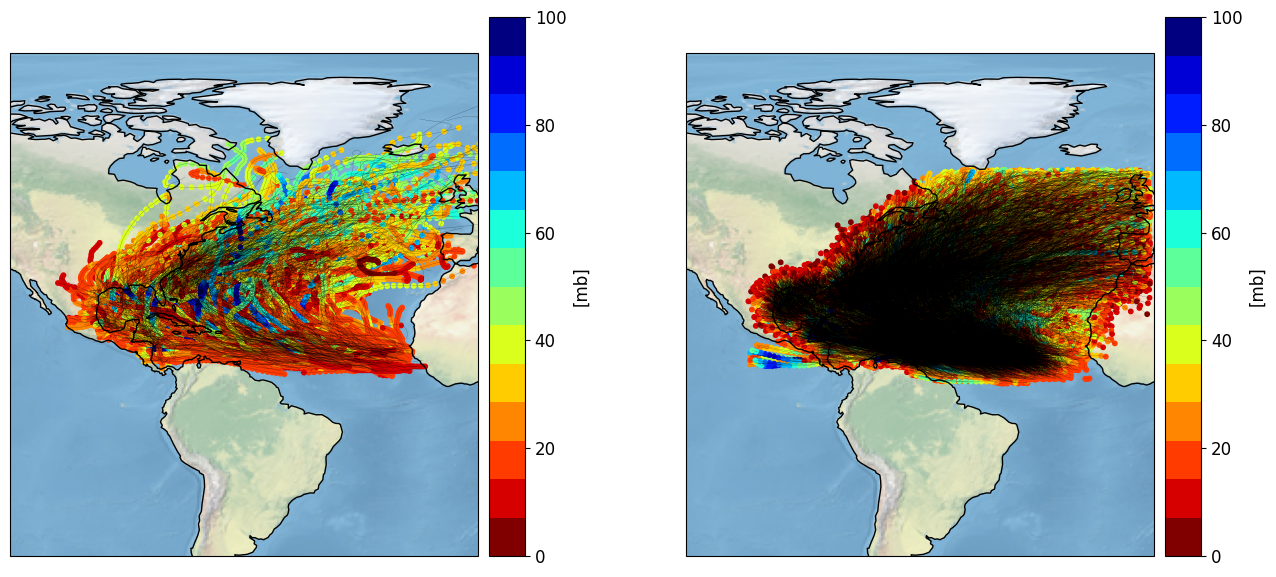

In [156]:
importlib.reload(cheer_utils)
norm = mpl.colors.Normalize(vmin=0, vmax=100)

if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
    ax=ax.flatten()
    
    ax[0].stock_img()
    ax[0].coastlines()
    ax[1].stock_img()
    ax[1].coastlines()
    
#     ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())

#     ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())

    for i in range(0,2):
        ax[i].axis('equal')
        ax[i].set_ylim([10, 50])
        ax[i].set_xlim([-120, 0])
        ax[i].grid(True)

cheer_utils.TrackPlot(df_ib, axx=ax[0], addcolorbar=True, norm=norm)
cheer_utils.TrackPlot(df_st, axx=ax[1], addcolorbar=True, norm=norm)

Text(0.5, 1.0, 'STORM')

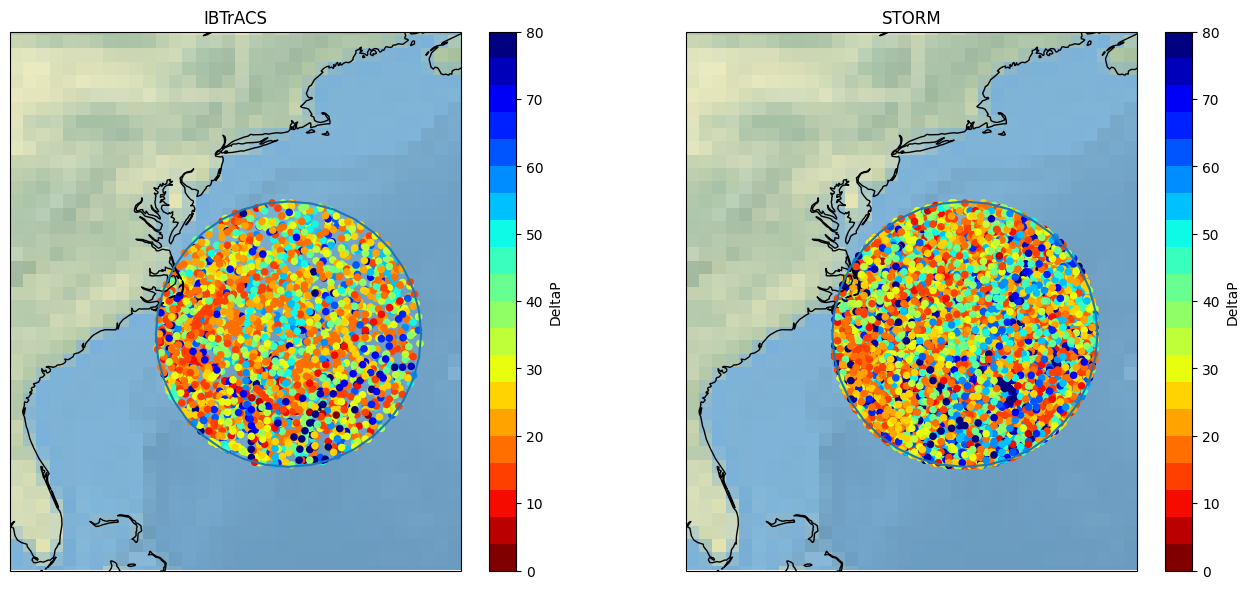

In [157]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))
ax=ax.flatten()

ax[0].stock_img()
ax[0].coastlines()
ax[1].stock_img()
ax[1].coastlines()

ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())

ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())

cmap=cheer_utils.discrete_cmap(20, 'jet_r')

for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim([30, 40])
    ax[i].set_xlim([-82, -65])
    ax[i].grid(True)

df_ib_nc.plot.scatter(x='Longitude',
            y='Latitude',
            c='DeltaP',
            ax=ax[0],vmin=0,vmax=80,cmap=cmap)
df_st_nc.plot.scatter(x='Longitude',
            y='Latitude',
            c='DeltaP',
            ax=ax[1],vmin=0,vmax=80,cmap=cmap)

ax[0].set_title('IBTrACS')
ax[1].set_title('STORM')

In [116]:
pd.cut(df_ib_nc.DeltaP, bins=10)

abssn
0                NaN
0                NaN
0                NaN
0                NaN
0                NaN
            ...     
1189    (22.0, 31.5]
1189    (22.0, 31.5]
1189    (22.0, 31.5]
1189    (31.5, 41.0]
1189    (31.5, 41.0]
Name: DeltaP, Length: 3662, dtype: category
Categories (10, interval[float64, right]): [(2.905, 12.5] < (12.5, 22.0] < (22.0, 31.5] < (31.5, 41.0] ... (60.0, 69.5] < (69.5, 79.0] < (79.0, 88.5] < (88.5, 98.0]]

98.0
112.29999999999995
388.92
444.480010986


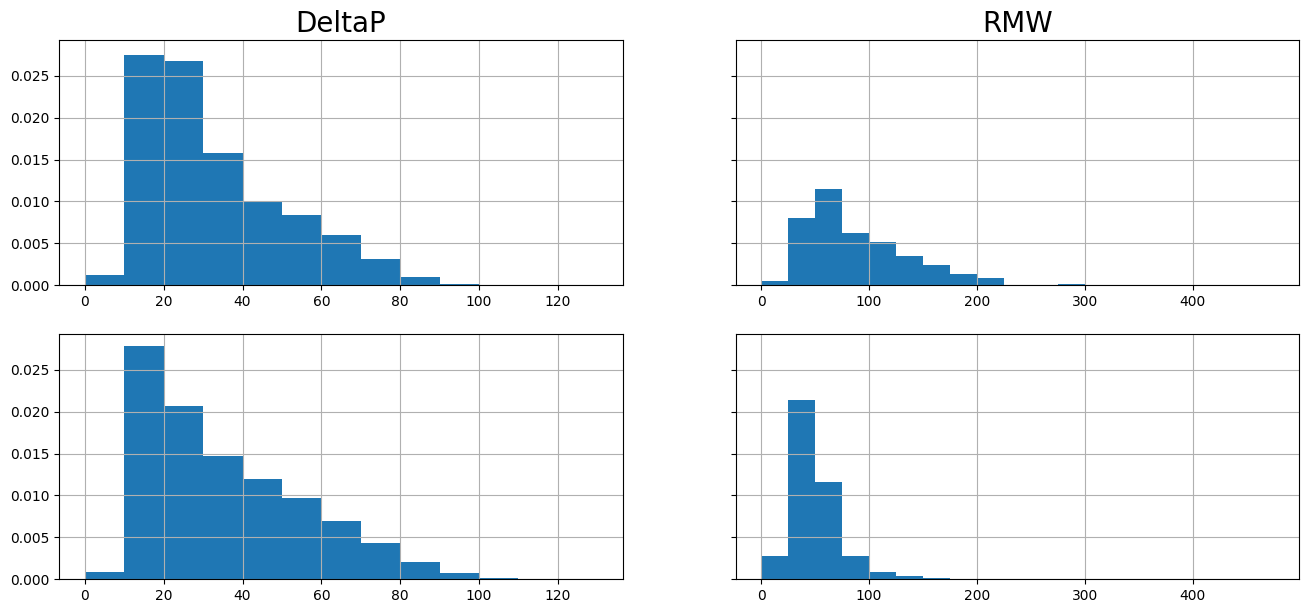

In [110]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,7), sharey=True) 

ax=ax.flatten()

k='DeltaP'
i=0
axx=((df_ib_nc[k])).hist(ax=ax[i], density=True, bins=range(0,140,10))
#axx=((df_ib[k])).hist(ax=ax[0], density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title(k,fontsize=20)

i=2
axx=((df_st_nc[k])).hist(ax=ax[i],density=True, bins=range(0,140,10))
#axx=((df_st['RMW'])).hist( ax=ax[1],density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title('')

print(df_ib_nc[k].max())
print(df_st_nc[k].max())

k='RMW'
i=1
axx=((df_ib_nc[k])).hist(ax=ax[i], density=True, bins=range(0,500,25))
#axx.set_ylim([0, .012])
#axx.set_xlabel(k)
ax[i].set_title(k,fontsize=20)

i=3
axx=((df_st_nc[k])).hist(ax=ax[i],density=True, bins=range(0,500,25))
#axx.set_ylim([0, .012])
#axx.set_xlabel(k)

print(df_ib_nc[k].max())
print(df_st_nc[k].max())

In [109]:
from scipy import stats
stats.ks_2samp(df_ib[np.isfinite(df_ib['DeltaP'])].DeltaP, df_st[np.isfinite(df_st['DeltaP'])].DeltaP)

# "NC" KstestResult(statistic=0.08930426008821235, pvalue=4.81719351118903e-15, statistic_location=42.0, statistic_sign=1)
# all KstestResult(statistic=0.1622379043492559, pvalue=0.0, statistic_location=24.0, statistic_sign=1)

KstestResult(statistic=0.1622379043492559, pvalue=0.0, statistic_location=24.0, statistic_sign=1)

In [107]:
df_ib_nc[np.isfinite(df_ib_nc['DeltaP'])].DeltaP

abssn
3       37.0
3       38.0
3       38.0
3       38.0
3       40.0
        ... 
1189    24.0
1189    28.0
1189    31.0
1189    33.0
1189    37.0
Name: DeltaP, Length: 2584, dtype: float64

In [87]:
df_ib[df_ib["RMW"] > 35]

,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,USA_ATCF_ID,SID,USA_STATUS,dist2nc,dist2tx,HollandB
abssn,,,,,,,,,,,,,,,,,,
783,2001,6,5,18,NA,28.5000,-95.3000,1002.0,25.722200,92.6,45,TS,AL012001,2001157N28265,TS,24.372167,1.640122,0.984105
783,2001,6,5,21,NA,28.9000,-95.3000,1003.0,23.149980,92.6,9,TS,AL012001,2001157N28265,TS,24.289144,1.431782,0.978925
783,2001,6,6,0,NA,29.3000,-95.3000,1003.0,23.149980,92.6,0,TS,AL012001,2001157N28265,TS,24.212445,1.315295,0.973745
783,2001,6,6,3,NA,29.6932,-95.2535,1004.0,19.034428,92.6,0,TS,AL012001,2001157N28265,TS,24.097435,1.268301,0.968653
783,2001,6,6,6,NA,30.1000,-95.2000,1006.0,15.433320,92.6,0,TS,AL012001,2001157N28265,TD,23.979418,1.341641,0.963385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2023,11,17,12,NA,17.0364,-79.8000,1004.0,15.433320,185.2,200,NR,AL222023,2023319N11282,DB,18.661040,18.893949,0.604739
1194,2023,11,17,15,NA,17.4991,-79.1718,1004.0,15.433320,277.8,115,NR,AL222023,2023319N11282,DB,17.970761,19.076088,0.070927
1194,2023,11,17,18,NA,18.0000,-78.5000,1004.0,15.433320,370.4,24,NR,AL222023,2023319N11282,DB,17.235501,19.300259,-0.463380


### interp experiments below.  not sorted out

In [ ]:

x_i, y_i = np.meshgrid(np.linspace(-100, -60, 80), np.linspace(10, 50, 80))
print(x_i.shape)
xy_i = np.concatenate([x_i.reshape(-1, 1), y_i.reshape(-1, 1)], axis=1)

# grid_x, grid_y = np.meshgrid(np.linspace(-90, -60, 20),
#                              np.linspace(10, 40, 20))
# xy_i = np.concatenate([grid_x, grid_y], axis=1)


In [ ]:
z=np.array(df_ib.Min_pres.values)
x = df_ib.Longitude.values
x = x[np.isfinite(z)] 
y = df_ib.Latitude.values
y = y[np.isfinite(z)] 
values = z[np.isfinite(z)] 

stride=10

x=x[::stride]
y=y[::stride]
values=values[::stride]

points=np.array([x,y]).T


print(x.shape)
print(values.shape)

In [ ]:
rbf = RBFInterpolator(points, values, kernel='gaussian',epsilon=2, smoothing=0.5)
z_i = rbf(xy_i).reshape(x_i.shape).T
z_i.shape

fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(6,6), dpi=100) # , sharey=True)
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))

axm=ax.contourf(x_i,y_i,z_i, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])


In [ ]:
model_rbf = sci.Rbf(x,y,values, smooth=1, degree=1, function='gaussian')

In [ ]:
Z_rbf = model_rbf(x_i, y_i)
vmin=880
vmax=1025
fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(12,12), dpi=100) # , sharey=True)

axm=ax.contourf(x_i,y_i,Z_rbf, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])

print(np.min(values),np.max(values))
print(np.min(Z_rbf),np.max(Z_rbf))
print(Z_rbf.shape)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))

ax.stock_img()
ax.coastlines()

plt.pcolor(grid_x,grid_y,z_i, )

ax.axis('equal')
ax.set_ylim([10, 50])
ax.set_xlim([-100, -50])
ax.grid(True)

In [ ]:
rng = np.random.default_rng()
points = rng.random((1000, 2))

In [ ]:
rng = np.random.default_rng()
xy = rng.random((100, 2))*4.0-2.0
z = xy[:, 0]*np.exp(-xy[:, 0]**2-xy[:, 1]**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
x_i, y_i = np.meshgrid(centers, centers)
x_i = x_i.reshape(-1, 1)
y_i = y_i.reshape(-1, 1)
xy_i = np.concatenate([x_i, y_i], axis=1)
rbf = RBFInterpolator(xy, z, epsilon=2)

In [ ]:
ib_yc=[]
st_yc=[]
for y in np.unique(df_ib.Year):
    i = df_ib.loc[(df_ib['Year'] == y)] 
    ib_yc.append(np.unique(i.index).shape[0])
for y in np.unique(df_st.Year):
    i = df_st.loc[(df_st['Year'] == y)] 
    st_yc.append(np.unique(i.index).shape[0])

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,7),sharex=True, sharey=True)

ax[0].hist(ib_yc, density=True)
ax[1].hist(st_yc, density=True)

ax[0].grid(True)
ax[1].grid(True)